In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Pandas Profiling EDA
from pandas_profiling import ProfileReport

In [58]:
#Load data into dataframes
df = pd.read_csv('data/credit_risk_dataset.csv')

In [59]:
df.head(3)

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3

In [62]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [64]:
#Plots

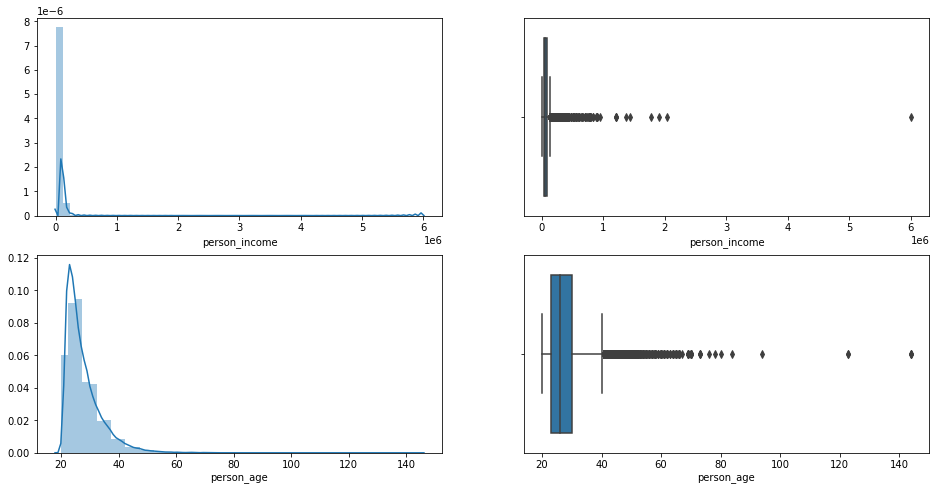

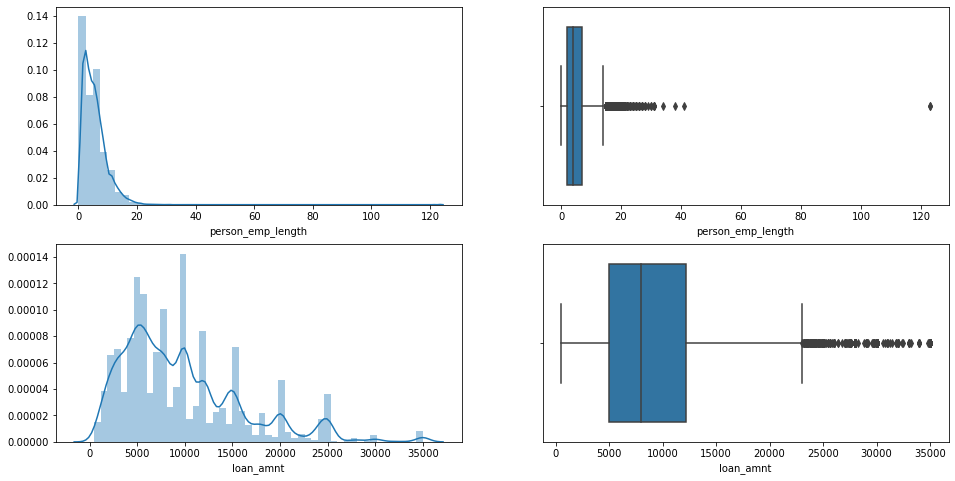

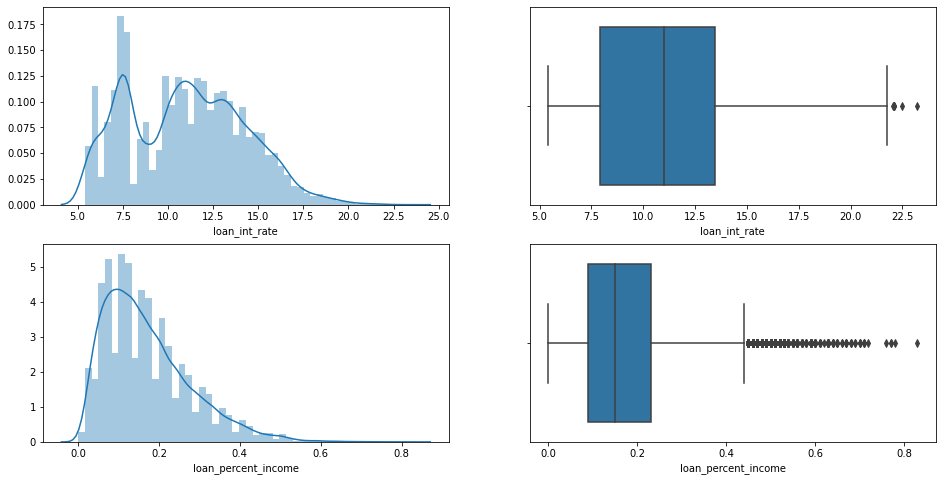

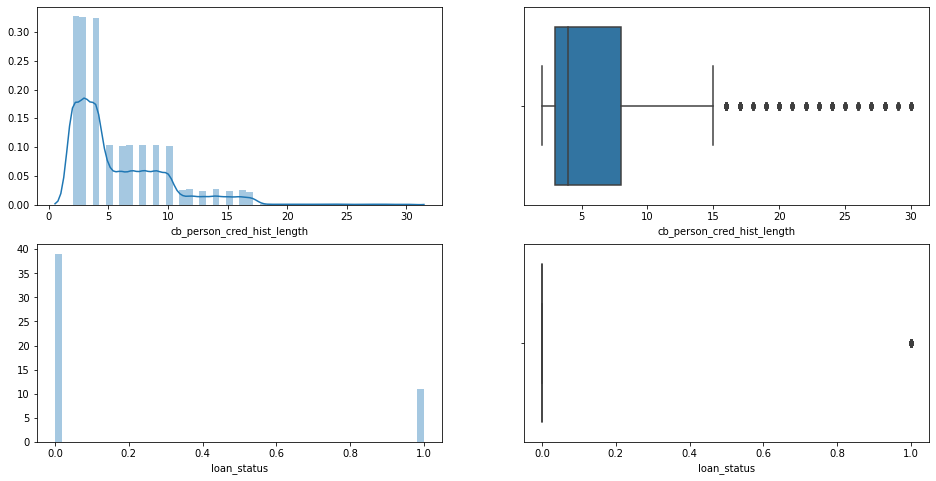

In [72]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['person_income'])
plt.subplot(2,2,2)
sns.boxplot(df['person_income'])
plt.subplot(2,2,3)
sns.distplot(df['person_age'])
plt.subplot(2,2,4)
sns.boxplot(df['person_age'])
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['person_emp_length'])
plt.subplot(2,2,2)
sns.boxplot(df['person_emp_length'])
plt.subplot(2,2,3)
sns.distplot(df['loan_amnt'])
plt.subplot(2,2,4)
sns.boxplot(df['loan_amnt'])
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['loan_int_rate'])
plt.subplot(2,2,2)
sns.boxplot(df['loan_int_rate'])
plt.subplot(2,2,3)
sns.distplot(df['loan_percent_income'])
plt.subplot(2,2,4)
sns.boxplot(df['loan_percent_income'])
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['cb_person_cred_hist_length'])
plt.subplot(2,2,2)
sns.boxplot(df['cb_person_cred_hist_length'])
plt.subplot(2,2,3)
sns.distplot(df['loan_status'])
plt.subplot(2,2,4)
sns.boxplot(df['loan_status'])
plt.show()

In [73]:
#Check for null values
print(df.isnull().values.any())

True


In [74]:
#Check whcih fields are missing records
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [75]:
#fill in missing interest rate with median value
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [76]:
#delete records with missing employment length
# drop all rows with NaN values
df.dropna(axis=0,inplace=True)

In [77]:
print(df.isnull().values.any())

False


In [79]:
#One hot encoding of categorical variables
df_new = pd.get_dummies(data=df,columns=['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'])

In [80]:
#Removing outliers
df_new = df_new[df_new["person_age"]<=100]
df_new = df_new[df_new["person_emp_length"]<=100]
df_new = df_new[df_new["person_income"]<= 4000000]

In [81]:
df_new.head(3)

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
1            0                 0.10                           2   
2            1                 0.57                           3   
3            1                 0.53                           2   

   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  ...  \
1                               0                            0  ...   
2                               1                            0  ...   
3                               0                            0  ...   

   loan_intent_VENTURE  loan_grade_A  loan_grade_B  loan_grade_C  \
1                    0             0             1             0   
2                    0             0             0             1   
3                    0             0             0             1   

   loan_grade_D  loan_grade_E  loan_grade_F  loan_grade_G  \
1             0             0             0             0   
2             0             0             0             0   
3             0             0             0             0   

   cb_person_default_on_file_N  cb_person_default_on_file_Y  
1                            1                            0  
2                            1                            0  
3                            1                            0  

[3 rows x 27 columns]

In [ ]:
#Export to csv to load into Big Query

In [83]:
df_new.to_csv(r'data\bq_loan_data.csv', index = False)

In [82]:
profile = ProfileReport(df_new, title='Credit Loan Default Report')
profile

Summarize dataset:   0%|          | 0/41 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
print("Highest allowed",df['person_age'].mean() + 4*df['person_age'].std())
print("Lowest allowed",df['person_age'].mean() - 4*df['person_age'].std())